In [4]:
from qiskit import *
from qiskit.visualization import plot_histogram, plot_bloch_multivector, plot_state_qsphere

In [39]:
def initialize(circuit, n):
    circuit.x(n)
    
    for qbit in range(n+1):
        circuit.h(qbit)

In [40]:
def add_cnot_gates(circuit, n, number):
    for index, value in enumerate(reversed(number)):    # qubits in Qiskit are reversed
        if value == '1':
            circuit.cx(index, n)

In [41]:
def main(n, number):
    qc = QuantumCircuit(n+1, n)    # +1 for ancilla bit
    
    initialize(qc, n)
    qc.barrier()
    
    add_cnot_gates(qc, n, number)
    qc.barrier()
    
    for qbit in range(n):
        qc.h(qbit)
        
    qc.measure(range(n), range(n))
    
    display(qc.draw('mpl'))
    return circuit

Enter secret number: 1010011


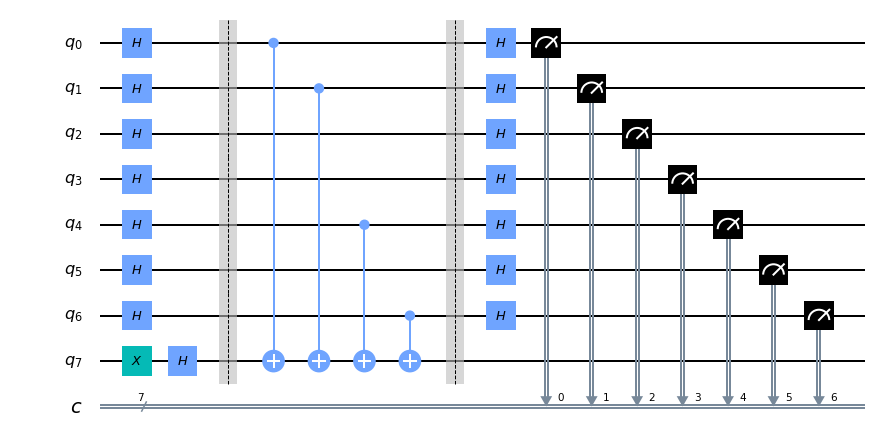

In [42]:
if __name__ == '__main__':
    secret_number = input('Enter secret number: ')
    n = len(secret_number)
    circuit = main(n, secret_number)

In [43]:
backend = Aer.get_backend('qasm_simulator')
results = execute(circuit, backend, shots = 1).result()
counts = results.get_counts()
print(counts)
plot_histogram(counts)

AttributeError: module 'qiskit.circuit' has no attribute 'name'